In [ ]:
import tensorflow as tf
from tensorflow import keras
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
"""
60,000 of hte 70,000 are used to train the network. Then 10,000 ones that it hasn't previously seen can be used to test 
  how good or how bad it's performing.
train is a boot, but label is a number 9
  Use number to avoid bais, instead of labeling with words
immage is represented as a 28 x 28 array of grayscales

3 layers
important: first and last layers
Flattens take 28 by 28 square and turns it into a simple linear array
Hidden layer has a 128 neurons in it.

last has 10 neurons in it b/c we have 10 classes of closthes in dataset.
create neural network that gives computers basic computervision capabilties to recognize items of clothing
"""
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), #this is the shape we should expect data to be in
  keras.layers.Dense(128, activation=tf.nn.relu), 
  keras.layers.Dense(10, activation=tf.nn.softmax)                         
    ])

In [ ]:
"""
data for a particular image has grid from 0 to 255 with pixel grayscale values
"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Label: 9

Image Pixel Array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3 

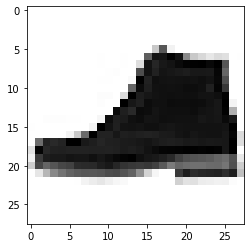

In [ ]:
"""
pixel numbers 0 to 255
image has values from 0 to 255
"""

index = 42

#set number of charaters per row when printing
np.set_printoptions(linewidth=320)

#print label and image
print(f'Label: {train_labels[index]}')
print(f'\nImage Pixel Array:\n {train_images[index]}')

#visualize image
plt.imshow(train_images[index], cmap='Greys')

In [ ]:
"""
neural networks work better with normalized data
Sequenrtial- defines a sequence of layers in neural network
Flatten- images were a 28 x 28 pixel matrix
  Flatten takes square and turns it into a 1D array
  Dense-adds a layer of neurons
Each layer of neurons needs and activation function to tell them what to do.

Relu- it only passes values 0 or greater to the next layer in network.
softmax- takes a list of values and sclaes threse so the sum of all elements will be equal to 1.
  When applied ot model outputs think of scaled values as the probability for that class
  ie, in this case having the highest value at index=4 means that the model is most confident that the inpout clothing images is a coat.

"""
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), #this is the shape we should expect data to be in
  keras.layers.Dense(128, activation=tf.nn.relu), 
  keras.layers.Dense(10, activation=tf.nn.softmax)                         
    ])

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
"""
model is defined above
Now build it.  compile the model with optimizer and loss function 
train it by calling model.fit() asking model to fit your training data to your training labels.
  It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks 
  like the training data, then it can predict what the label for that input is.

Once it's done training -- you should see an accuracy value at the end of the final epoch, like 0.9098. This tells you that your 
  neural network is about 90% accurate in classifying the training data.  It figured out a pattern match between the image and the labels
   that worked 91% of the time. It was only trained for 5 epochs and done quite quickly.

Guessing the relationship between the images and their labels
"""
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4977 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3720 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3331 - accuracy: 0.8787
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3123 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2947 - accuracy: 0.8911


In [ ]:
"""
But how would it work with unseen data? That's why we have the test images and labels. We can call model.evaluate() with this 
test dataset as inputs and it will report back the loss and accuracy of the model
accuracy here to be about 0.88 which means it was 88% accurate on the entire test set. It probably would not do as well with unseen data 
  as it did with data it was trained on!
"""
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3412 - accuracy: 0.8784


[0.3411562144756317, 0.8784000277519226]

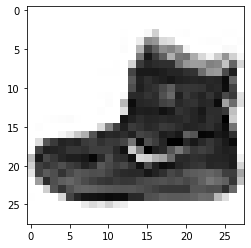

In [ ]:
#the 1st image in dataset is boot, which is # 9
index = 0

#visualize image
plt.imshow(train_images[index], cmap='Greys')

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

[1.7241720e-07 1.5624903e-07 1.8054715e-07 7.2628219e-09 2.5912672e-07 2.4971077e-03 2.3042942e-07 3.9143991e-03 5.8486480e-06 9.9358165e-01]


In [ ]:
"""
These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), 
i.e. the first value in the list is the probability that the image is '0' (T-shirt/top), the next is a '1' (Trouser) etc. 
Notice that they are all VERY LOW probabilities. For index 9 (Ankle boot), the probability was in the 90's, 
i.e. the neural network is telling us that the image is most likely an ankle boot.

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

print(test_labels[0])

9


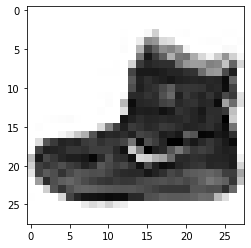

In [ ]:
#the 1st image in dataset is boot, which is # 9
index = 0

#visualize image
plt.imshow(train_images[index], cmap='Greys')

In [ ]:
classifications1 = model.predict(test_images)
print(classifications1[0])

[1.7241720e-07 1.5624903e-07 1.8054715e-07 7.2628219e-09 2.5912672e-07 2.4971077e-03 2.3042942e-07 3.9143991e-03 5.8486480e-06 9.9358165e-01]


In [ ]:
print(test_labels[0])

9


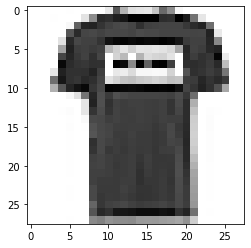

In [ ]:
index = 1

#visualize image
plt.imshow(train_images[index], cmap='Greys')

In [ ]:
classifications1 = model.predict(test_images)
print(classifications1[1])

[4.3866075e-05 1.5199961e-10 9.9421859e-01 2.8203832e-08 3.0463426e-03 6.2662039e-08 2.6910761e-03 2.4918801e-13 9.5174553e-09 1.6972674e-13]


In [ ]:
print(test_labels[1])

2


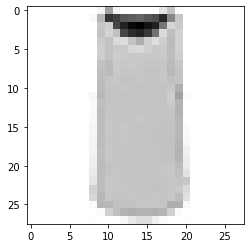

In [ ]:
index = 2

#visualize image
plt.imshow(train_images[index], cmap='Greys')

In [ ]:
classifications1 = model.predict(test_images)
print(classifications1[2])

[2.3389867e-07 9.9999952e-01 2.7766555e-08 2.4183350e-07 2.2058904e-08 1.5644378e-11 4.7952109e-10 1.3288558e-19 2.1501866e-10 1.5097446e-16]


In [ ]:
print(test_labels[2])

1


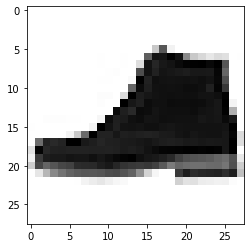

In [ ]:
index = 42

#visualize image
plt.imshow(train_images[index], cmap='Greys')

In [ ]:
classifications1 = model.predict(test_images)
print(classifications1[42])

[1.9423646e-01 3.0783305e-03 9.2973402e-03 8.8157095e-02 3.7335724e-02 2.1255016e-07 6.6757786e-01 1.6097962e-08 3.1678236e-04 1.6656529e-07]


In [ ]:
print(test_labels[42])

3


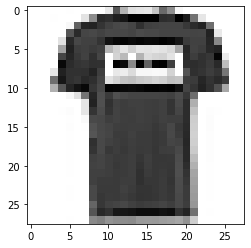

In [ ]:
index = 1

#visualize image
plt.imshow(train_images[index], cmap='Greys')

In [ ]:
classifications1 = model.predict(test_images)
print(classifications1[5])

[1.98586509e-04 9.99746859e-01 1.75862151e-05 1.52747107e-05 1.29702175e-05 4.01926172e-08 8.69613268e-06 7.78674900e-16 1.58822075e-08 8.16805499e-13]


In [ ]:
print(test_labels[5])

1


In [ ]:
classifications1 = model.predict(test_images)
print(classifications1[116])

[1.2241976e-04 4.8049687e-06 5.7697995e-05 4.0925729e-06 2.5898760e-05 6.0375846e-06 3.7969783e-04 2.5329005e-06 9.9939179e-01 4.9514565e-06]


In [ ]:
print(test_labels[116])

8


In [ ]:
"""
first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons 
  would be infeasible
we add the Flatten() layer at the begining, when arrays are loaded into the model later, they'll automatically be flattened for us.
"""


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print('---------------------')
print(classifications[1])
print(test_labels[1])

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4740 - accuracy: 0.8290
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3567 - accuracy: 0.8687
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3220 - accuracy: 0.8814
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2958 - accuracy: 0.8904
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3396 - accuracy: 0.8776
---------------------
[1.8152090e-04 1.3882657e-11 9.9572408e-01 1.3447291e-08 1.1880553e-03 8.9981573e-12 2.9064070e-03 1.6683456e-14 3.5708538e-08 5.4841170e-10]
2


In [ ]:

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
print('--------------')

print(model.evaluate(test_images, test_labels))

classifications = model.predict(test_images)
print('---------------------')
print(classifications[1])
print(test_labels[1])

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4696 - accuracy: 0.8285
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3523 - accuracy: 0.8708
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3172 - accuracy: 0.8814
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2924 - accuracy: 0.8912
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2774 - accuracy: 0.8970
--------------
313/313 [==============================] - 2s 5ms/step - loss: 0.3550 - accuracy: 0.8670
[0.3550398647785187, 0.8669999837875366]
---------------------
[1.8164780e-04 7.2950541e-11 9.9143523e-01 9.4069357e-09 6.7958697e-03 3.0885339e-13 1.5872238e-03 2.5602538e-14 4.5990425e-09 4.5946488e-13]
2


In [ ]:
"""
How can I stop training when I reach a point that I want to be at?
training loop support callback so in every epoch you can callback to a code function,
    check the metrics and if they're what you want then you can cancel trainng at that point.

model.fit() - executes the training loop
Gets called by the callback whenever the epoch ends
Instantiantiate the class just created with: callbacks = myCallback()
In model.fit() use callback parameter and pass it the instance of the class which is callbacks     


"""


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.87): # Experiment with changing this value
      print("\nReached 87% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

print('--------------')

print(model.evaluate(test_images, test_labels))

classifications = model.predict(test_images)
print('---------------------')
print(classifications[112])
print(test_labels[112])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4734 - accuracy: 0.8304
Epoch 2/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.3568 - accuracy: 0.8702
Reached 87% accuracy so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3568 - accuracy: 0.8702
--------------
313/313 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.8713
[0.3624347746372223, 0.8712999820709229]
---------------------
[7.7137895e-07 8.6187704e-08 7.3410541e-07 9.7275336e-07 4.5916320e-07 2.2704762e-03 2.2293243e-07 9.9768579e-01 2.8769102e-05 1.1744264e-05]
7
